In [3]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Entrar a la carpeta notebooks
%cd /content/drive/MyDrive/TFG/ALIEN/notebooks

# 3. Código de descarga
import lightkurve as lk
import matplotlib.pyplot as plt
import os

# Crear carpeta de destino
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
save_path = os.path.join(project_root, "data", "raw")
os.makedirs(save_path, exist_ok=True)

# ⭐ Lista de 200 estrellas (nuevas, sin repetir las estudiadas)
target_stars = [
    "KIC 1430163", "KIC 1571511", "KIC 2307415", "KIC 2444412", "KIC 2853446",
    "KIC 3248523", "KIC 3325239", "KIC 3424541", "KIC 3626094", "KIC 3744043",
    "KIC 3856812", "KIC 4074942", "KIC 4143755", "KIC 4356166", "KIC 4454743",
    "KIC 4570949", "KIC 4665571", "KIC 4750042", "KIC 4851539", "KIC 4947556",
    "KIC 5006817", "KIC 5091927", "KIC 5205120", "KIC 5286794", "KIC 5395126",
    "KIC 5511083", "KIC 5623413", "KIC 5730171", "KIC 5812124", "KIC 5910360",
    "KIC 6021202", "KIC 6131168", "KIC 6232521", "KIC 6338760", "KIC 6436564",
    "KIC 6541924", "KIC 6646827", "KIC 6745411", "KIC 6842390", "KIC 6937543",
    "KIC 7042057", "KIC 7134415", "KIC 7235123", "KIC 7328824", "KIC 7430645",
    "KIC 7529190", "KIC 7633431", "KIC 7736107", "KIC 7835129", "KIC 7932616",
    "KIC 8037224", "KIC 8139949", "KIC 8240401", "KIC 8337940", "KIC 8439292",
    "KIC 8540375", "KIC 8643025", "KIC 8749426", "KIC 8844665", "KIC 8947834",
    "KIC 9046734", "KIC 9143341", "KIC 9246357", "KIC 9347323", "KIC 9449634",
    "KIC 9549762", "KIC 9648900", "KIC 9747031", "KIC 9847391", "KIC 9947112",
    "KIC 10051479", "KIC 10154284", "KIC 10258343", "KIC 10362534", "KIC 10469067",
    "KIC 10574314", "KIC 10678147", "KIC 10785021", "KIC 10889265", "KIC 10994334",
    "KIC 11099387", "KIC 11202934", "KIC 11307943", "KIC 11412610", "KIC 11517676",
    "KIC 11623117", "KIC 11728062", "KIC 11832790", "KIC 11937821", "KIC 12042771",
    "KIC 12148009", "KIC 12253127", "KIC 12357817", "KIC 12462852", "KIC 12567744",
    "KIC 12672700", "KIC 12777710", "KIC 12882674", "KIC 12987536", "KIC 13092691",
    "Kepler-1", "Kepler-3", "Kepler-4", "Kepler-5", "Kepler-6", "Kepler-7", "Kepler-8",
    "Kepler-9", "Kepler-11", "Kepler-12", "Kepler-13", "Kepler-14", "Kepler-15",
    "Kepler-16", "Kepler-17", "Kepler-18", "Kepler-19", "Kepler-20", "Kepler-21",
    "Kepler-23", "Kepler-24", "Kepler-25", "Kepler-26", "Kepler-27", "Kepler-28",
    "Kepler-29", "Kepler-30", "Kepler-31", "Kepler-32", "Kepler-33", "Kepler-34",
    "Kepler-35", "Kepler-36", "Kepler-37", "Kepler-38", "Kepler-39", "Kepler-40",
    "Kepler-41", "Kepler-42", "Kepler-43", "Kepler-44", "Kepler-45", "Kepler-46",
    "Kepler-47", "Kepler-48", "Kepler-49", "Kepler-50", "Kepler-51", "Kepler-52",
    "Kepler-53", "Kepler-54", "Kepler-55", "Kepler-56", "Kepler-57", "Kepler-58",
    "Kepler-59", "Kepler-60", "Kepler-61", "Kepler-63", "Kepler-64", "Kepler-65",
    "Kepler-66", "Kepler-67", "Kepler-68", "Kepler-69", "Kepler-70", "Kepler-71",
    "Kepler-72", "Kepler-73", "Kepler-74", "Kepler-75", "Kepler-76", "Kepler-77",
    "Kepler-78", "Kepler-79", "Kepler-80", "Kepler-81", "Kepler-82", "Kepler-83",
    "Kepler-84", "Kepler-85", "Kepler-86", "Kepler-87", "Kepler-88", "Kepler-89",
    "Kepler-91", "Kepler-92", "Kepler-93", "Kepler-94", "Kepler-95", "Kepler-96",
    "Kepler-97", "Kepler-98", "Kepler-99", "Kepler-100", "Kepler-101", "Kepler-102",
    "Kepler-103", "Kepler-104", "Kepler-105", "Kepler-106", "Kepler-107", "Kepler-108",
    "Kepler-109", "Kepler-110", "Kepler-111", "Kepler-112", "Kepler-113", "Kepler-114"
]

# 🔄 Descargar y guardar
for target_star in target_stars:
    print(f"🔍 Descargando datos para {target_star}...")

    try:
        lc_collection = lk.search_lightcurve(target_star, mission="Kepler").download_all()

        if lc_collection is not None:
            lc = lc_collection.stitch()

            # Graficar
            plt.figure(figsize=(10, 5))
            lc.plot()
            plt.title(f"Curva de luz de {target_star}")
            plt.xlabel("Tiempo (días)")
            plt.ylabel("Brillo normalizado")
            plt.show()

            # Guardar CSV
            file_name = os.path.join(save_path, f"curva_luz_{target_star.replace(' ', '_')}.csv")
            lc.to_pandas().to_csv(file_name, index=False)
            print(f"✅ Guardado en: {file_name}")

        else:
            print(f"❌ No se encontraron datos para {target_star}.")

    except Exception as e:
        print(f"⚠️ Error al procesar {target_star}: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TFG/ALIEN/notebooks


/usr/local/lib/python3.11/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


🔍 Descargando datos para KIC 1430163...


KeyboardInterrupt: 

In [2]:
!pip install lightkurve --quiet


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.5.1 which is incompatible.
torch 2.6.0+cu124 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
import os

raw_data_path = "/content/drive/MyDrive/TFG/ALIEN/data/raw"  # Ajusta si tu ruta es distinta

# Mostrar los nombres base sin prefijo ni extensión
downloaded_stars = [
    f.replace("curva_luz_", "").replace(".csv", "")
    for f in os.listdir(raw_data_path)
    if f.endswith(".csv")
]

print(f"Total descargadas: {len(downloaded_stars)}")
print(downloaded_stars)


Total descargadas: 130
['KIC_8462852', 'KIC_12557548', 'KIC_3544595', 'KIC_8197761', 'Kepler-10', 'Kepler-22', 'Kepler-62', 'KIC_1430163', 'KIC_1571511', 'KIC_2307415', 'KIC_2444412', 'KIC_2853446', 'KIC_3325239', 'KIC_3424541', 'KIC_3626094', 'KIC_3744043', 'KIC_4143755', 'KIC_4570949', 'KIC_4665571', 'KIC_4947556', 'KIC_5006817', 'KIC_5286794', 'KIC_6541924', 'Kepler-1', 'Kepler-3', 'Kepler-4', 'Kepler-5', 'Kepler-6', 'Kepler-7', 'Kepler-8', 'Kepler-9', 'Kepler-11', 'Kepler-12', 'Kepler-13', 'Kepler-14', 'Kepler-15', 'Kepler-16', 'Kepler-17', 'Kepler-18', 'Kepler-19', 'Kepler-20', 'Kepler-21', 'Kepler-23', 'Kepler-24', 'Kepler-25', 'Kepler-26', 'Kepler-27', 'Kepler-28', 'Kepler-29', 'Kepler-30', 'Kepler-31', 'Kepler-32', 'Kepler-33', 'Kepler-34', 'Kepler-35', 'Kepler-36', 'Kepler-37', 'Kepler-38', 'Kepler-39', 'Kepler-40', 'Kepler-41', 'Kepler-42', 'Kepler-43', 'Kepler-44', 'Kepler-45', 'Kepler-46', 'Kepler-47', 'Kepler-48', 'Kepler-49', 'Kepler-50', 'Kepler-51', 'Kepler-52', 'Kepler


🔍 Procesando: Kepler-62
🧹 Se eliminaron 0 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_Kepler-62.csv

🔍 Procesando: KIC_8462852


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered

🧹 Se eliminaron 1563 outliers.


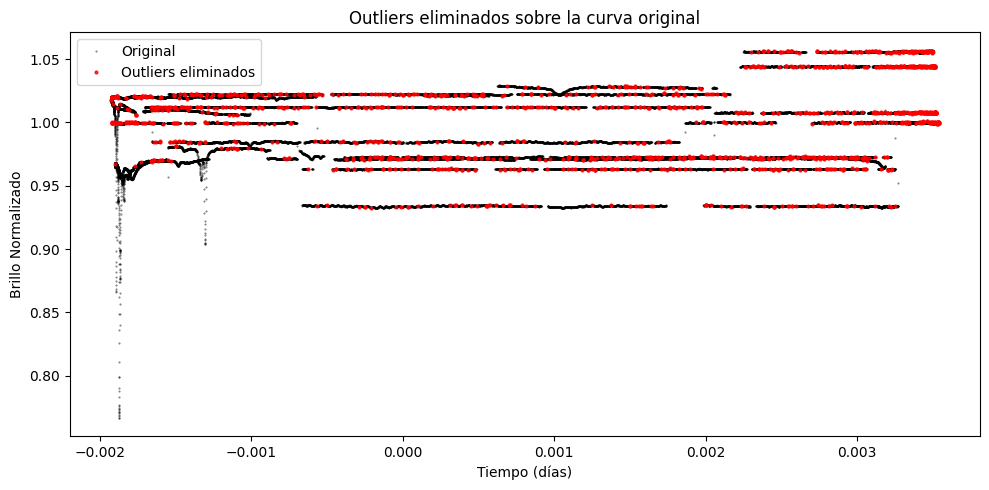

✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_8462852.csv

🔍 Procesando: KIC_12557548


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 23628 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_12557548.csv

🔍 Procesando: KIC_3544595


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 72773 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_3544595.csv

🔍 Procesando: KIC_8197761


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 876 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_8197761.csv

🔍 Procesando: Kepler-10


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 57960 outliers.


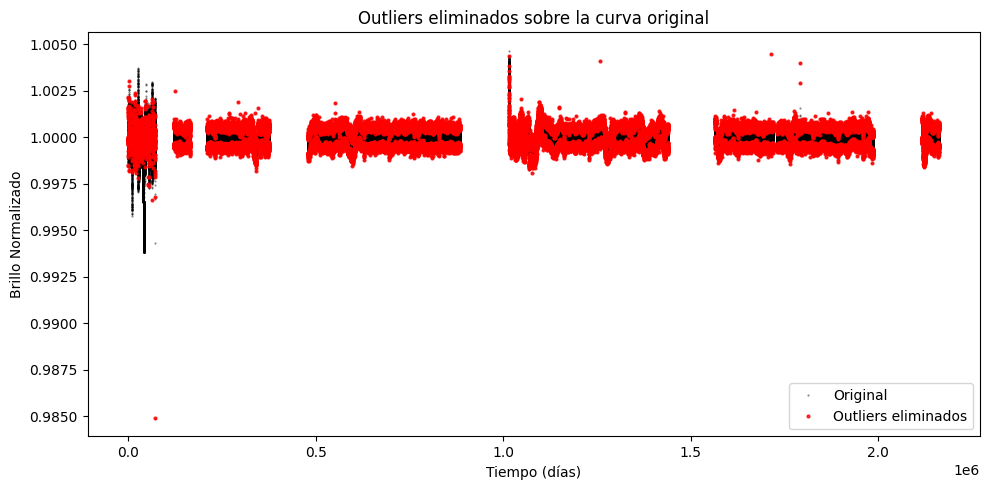

✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_Kepler-10.csv

🔍 Procesando: Kepler-22


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 69194 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_Kepler-22.csv

🔍 Procesando: KIC_1430163


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 6806 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_1430163.csv

🔍 Procesando: KIC_1571511


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 1856 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_1571511.csv

🔍 Procesando: KIC_2307415


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 1847 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_2307415.csv

🔍 Procesando: KIC_2444412


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 70362 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_2444412.csv

🔍 Procesando: KIC_2853446


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 4276 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_2853446.csv

🔍 Procesando: KIC_3325239


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 2425 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_3325239.csv

🔍 Procesando: KIC_3424541
❌ Error procesando KIC_3424541: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

🔍 Procesando: KIC_3626094


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 1666 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_3626094.csv

🔍 Procesando: KIC_3744043


/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:83: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_mean'] = df_filtered['rolling_mean'].fillna(method='bfill').fillna(method='ffill')
/content/drive/MyDrive/TFG/ALIEN/src/preprocessings.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['rolling_std'] = df_filtered['rolling_std'].fillna(method='bfill').fillna(method='ffill')


🧹 Se eliminaron 2035 outliers.
✅ Guardado en: /content/drive/MyDrive/TFG/ALIEN/data/processed/train/curva_luz_KIC_3744043.csv

🔍 Procesando: KIC_4143755


KeyboardInterrupt: 

In [1]:
# ✅ process_data_colab.py – listo para ejecutarse en una celda de Colab

import sys
import os

# Ruta base al proyecto en tu Google Drive
project_root = "/content/drive/MyDrive/TFG/ALIEN"
sys.path.append(project_root)

from src.preprocessings import (
    load_lightcurve,
    remove_isolated_outliers,
    save_processed_data,
    plot_removed_outliers
)

# 🧭 Rutas de datos
raw_data_path = os.path.join(project_root, "data", "raw")
train_path = os.path.join(project_root, "data", "processed", "train")
test_path = os.path.join(project_root, "data", "processed", "test")

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# ✅ Estrellas ya descargadas
all_downloaded = [
    "KIC_8462852", "KIC_12557548", "KIC_3544595", "KIC_8197761", "Kepler-10", "Kepler-22", "Kepler-62", "KIC_1430163",
    "KIC_1571511", "KIC_2307415", "KIC_2444412", "KIC_2853446", "KIC_3325239", "KIC_3424541", "KIC_3626094",
    "KIC_3744043", "KIC_4143755", "KIC_4570949", "KIC_4665571", "KIC_4947556", "KIC_5006817", "KIC_5286794",
    "KIC_6541924", "Kepler-1", "Kepler-3", "Kepler-4", "Kepler-5", "Kepler-6", "Kepler-7", "Kepler-8", "Kepler-9",
    "Kepler-11", "Kepler-12", "Kepler-13", "Kepler-14", "Kepler-15", "Kepler-16", "Kepler-17", "Kepler-18",
    "Kepler-19", "Kepler-20", "Kepler-21", "Kepler-23", "Kepler-24", "Kepler-25", "Kepler-26", "Kepler-27",
    "Kepler-28", "Kepler-29", "Kepler-30", "Kepler-31", "Kepler-32", "Kepler-33", "Kepler-34", "Kepler-35",
    "Kepler-36", "Kepler-37", "Kepler-38", "Kepler-39", "Kepler-40", "Kepler-41", "Kepler-42", "Kepler-43",
    "Kepler-44", "Kepler-45", "Kepler-46", "Kepler-47", "Kepler-48", "Kepler-49", "Kepler-50", "Kepler-51",
    "Kepler-52", "Kepler-53", "Kepler-54", "Kepler-55", "Kepler-56", "Kepler-57", "Kepler-58", "Kepler-59",
    "Kepler-60", "Kepler-61", "Kepler-63", "Kepler-64", "Kepler-65", "Kepler-66", "Kepler-67", "Kepler-68",
    "Kepler-69", "Kepler-70", "Kepler-71", "Kepler-74", "Kepler-75", "Kepler-76", "Kepler-77", "Kepler-78",
    "Kepler-79", "Kepler-80", "Kepler-81", "Kepler-82", "Kepler-83", "Kepler-84", "Kepler-85", "Kepler-86",
    "Kepler-87", "Kepler-88", "Kepler-89", "Kepler-91", "Kepler-92", "Kepler-93", "Kepler-94", "Kepler-95",
    "Kepler-96", "Kepler-97", "Kepler-98", "Kepler-99", "Kepler-100", "Kepler-101", "Kepler-102", "Kepler-103",
    "Kepler-104", "Kepler-105", "Kepler-106", "Kepler-107", "Kepler-108", "Kepler-109", "Kepler-110",
    "Kepler-111", "Kepler-112", "Kepler-113", "Kepler-114"
]

# 💡 Dividimos 80% para entrenamiento, 20% para test
split_idx = int(0.8 * len(all_downloaded))
train_stars = all_downloaded[:split_idx]
test_stars = all_downloaded[split_idx:]

# 🔄 Procesar archivos
for filename in os.listdir(raw_data_path):
    if not filename.endswith(".csv"):
        continue

    star_name = filename.replace("curva_luz_", "").replace(".csv", "")
    full_path = os.path.join(raw_data_path, filename)

    print(f"\n🔍 Procesando: {star_name}")

    try:
        df = load_lightcurve(full_path)
        df_filtered = remove_isolated_outliers(df)

        # Solo graficamos unas pocas para no colapsar la sesión
        if star_name in ["KIC_8462852", "Kepler-10", "Kepler-90"]:
            plot_removed_outliers(df, df_filtered)

        # Guardar en el set adecuado
        if star_name in train_stars:
            output_path = os.path.join(train_path, filename)
        elif star_name in test_stars:
            output_path = os.path.join(test_path, filename)
        else:
            print(f"⚠️ {star_name} no está en ninguna lista. Saltando.")
            continue

        save_processed_data(df_filtered, output_path)

    except Exception as e:
        print(f"❌ Error procesando {star_name}: {e}")


In [10]:
# scripts/run_pca.py

import os
import sys
import pandas as pd

# ✅ Ajuste para ejecución en notebook o Colab
project_root = "/content/drive/MyDrive/TFG/ALIEN"
sys.path.append(project_root)

from src.pca_analysis import (
    load_processed_data,
    standardize_data,
    apply_pca,
    plot_pca_results,
    save_pca_results
)

# 📁 Rutas absolutas
train_input = os.path.join(project_root, "data", "processed", "train")
test_input  = os.path.join(project_root, "data", "processed", "test")

train_output = os.path.join(project_root, "results", "pca", "train")
test_output  = os.path.join(project_root, "results", "pca", "test")
os.makedirs(train_output, exist_ok=True)
os.makedirs(test_output, exist_ok=True)

# 🔬 PCA sobre entrenamiento
print("🔬 PCA sobre curvas de entrenamiento...")
train_matrix, train_names = load_processed_data(train_input)
train_matrix_std = standardize_data(train_matrix)
train_pcs, train_var, pca_model = apply_pca(train_matrix_std, return_model=True)

# Nombres
save_pca_results(train_pcs, train_names, os.path.join(train_output, "pca_results.csv"))
plot_pca_results(train_pcs, train_var, train_names)

# 🔬 PCA sobre test (aplicando el modelo del train)
print("🔬 PCA sobre curvas de test...")
test_matrix, test_names = load_processed_data(test_input)
test_matrix_std = standardize_data(test_matrix)
test_pcs = pca_model.transform(test_matrix_std)

save_pca_results(test_pcs, test_names, os.path.join(test_output, "pca_results.csv"))
plot_pca_results(test_pcs, train_var, test_names)

print("✅ Análisis PCA finalizado.")


🔬 PCA sobre curvas de entrenamiento...


TypeError: apply_pca() got an unexpected keyword argument 'return_model'

In [7]:
# scripts/run_iforest_colab.py (adaptado para Colab)

import os
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import plotly.express as px

# 🧭 Ruta base adaptada a Colab (asume que estás dentro de notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

train_pca_path = os.path.join(project_root, "results", "pca", "train", "pca_results.csv")
test_pca_path = os.path.join(project_root, "results", "pca", "test", "pca_results.csv")

train_dir = os.path.join(project_root, "data", "processed", "train")
test_dir = os.path.join(project_root, "data", "processed", "test")

result_dir = os.path.join(project_root, "results", "isolation_forest")
os.makedirs(result_dir, exist_ok=True)

# 1️⃣ Cargar resultados PCA
df_train = pd.read_csv(train_pca_path)
df_test = pd.read_csv(test_pca_path)

# 2️⃣ Asociar nombres de estrella
train_names = sorted([f.replace("curva_luz_", "").replace(".csv", "") for f in os.listdir(train_dir) if f.endswith(".csv")])
test_names = sorted([f.replace("curva_luz_", "").replace(".csv", "") for f in os.listdir(test_dir) if f.endswith(".csv")])

df_train['Star'] = train_names[:len(df_train)]
df_test['Star'] = test_names[:len(df_test)]

# 3️⃣ Entrenar modelo Isolation Forest
print("🚀 Entrenando Isolation Forest...")
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(df_train[['PC1', 'PC2']])

# 4️⃣ Predecir anomalías en test
print("🔍 Detectando anomalías en test...")
df_test['Anomaly'] = iso_forest.predict(df_test[['PC1', 'PC2']])
df_test['Score'] = iso_forest.decision_function(df_test[['PC1', 'PC2']])

# 5️⃣ Visualización
fig = px.scatter(
    df_test,
    x='PC1',
    y='PC2',
    color='Anomaly',
    hover_data=['Star', 'Score'],
    title='🔍 Anomaly Detection using Isolation Forest',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'Anomaly': 'Anomaly'},
    template='plotly_white'
)
fig.update_traces(marker=dict(size=10))
fig.show()

# 6️⃣ Guardar resultados
df_test.to_csv(os.path.join(result_dir, "pca_isolation_forest_results.csv"), index=False)
fig.write_html(os.path.join(result_dir, "isolation_forest_plot.html"))

print("✅ Results saved in 'results/isolation_forest'")


FileNotFoundError: [Errno 2] No such file or directory: '/results/pca/train/pca_results.csv'